In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-plate-detection/annotations/Cars339.xml
/kaggle/input/car-plate-detection/annotations/Cars13.xml
/kaggle/input/car-plate-detection/annotations/Cars74.xml
/kaggle/input/car-plate-detection/annotations/Cars16.xml
/kaggle/input/car-plate-detection/annotations/Cars291.xml
/kaggle/input/car-plate-detection/annotations/Cars236.xml
/kaggle/input/car-plate-detection/annotations/Cars429.xml
/kaggle/input/car-plate-detection/annotations/Cars132.xml
/kaggle/input/car-plate-detection/annotations/Cars251.xml
/kaggle/input/car-plate-detection/annotations/Cars51.xml
/kaggle/input/car-plate-detection/annotations/Cars165.xml
/kaggle/input/car-plate-detection/annotations/Cars313.xml
/kaggle/input/car-plate-detection/annotations/Cars240.xml
/kaggle/input/car-plate-detection/annotations/Cars201.xml
/kaggle/input/car-plate-detection/annotations/Cars412.xml
/kaggle/input/car-plate-detection/annotations/Cars227.xml
/kaggle/input/car-plate-detection/annotations/Cars145.xml
/kaggle/input/car-

In [5]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.1/869.1 kB 20.8 MB/s eta 0:00:0000:01


In [6]:
!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.2 MB/s eta 0:00:00:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.7
    Uninstalling widgetsnbextension-3.6.7:
      Successfully uninstalled widgetsnbextension-3.6.7
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [7]:
dataset_path = '/kaggle/input/car-plate-detection'
import os
import cv2
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import re 

def the_number_in_the_string(filename):
    match = re.search(r'(\d+)',filename)
    if match:
        return int(match.group(0))
    else :
        return 0

# if __name__ == '_main_':     
the_number_in_the_string('file6565')

6565

In [9]:
# Initialize a dictionary to store labels and image information
label_dict = dict(
                img_path=[],
                xmin=[],
                xmax=[],
                ymin=[],
                ymax=[],
                img_h=[],
                img_w=[]
    )

In [10]:
# Get the list of XML files from the annotations directory
import os 
from glob import glob 

xml_file = glob(f'{dataset_path}/annotations/*.xml')
xml_file

['/kaggle/input/car-plate-detection/annotations/Cars339.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars13.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars74.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars16.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars291.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars236.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars429.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars132.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars251.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars51.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars165.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars313.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars240.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars201.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars412.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars227.xml',
 '/kaggle/in

In [11]:
import xml.etree.ElementTree as xet


# Process each XML file, sorted by the numerical value in the filename 
for filename in sorted( xml_file , key =the_number_in_the_string):
    print(filename)
    # Parse the XML file
    info = xet.parse(filename)
    root = info.getroot()
#     print(info)
#     print(root)
    
    
# Find the 'object' element in the XML and extract bounding box information
    member_object = root.find('object')
    label_info = member_object.find('bndbox')
#     print(member_object,label_info)
    
    xmin = int(label_info.find('xmin').text)
    xmax = int(label_info.find('xmax').text)
    ymin = int(label_info.find('ymin').text)
    ymax = int(label_info.find('ymax').text)
#     print(xmin,xmax,ymin,ymax)
    
    
    # Get the image filename and construct the full path to the image
    img_name = root.find('filename').text
    img_path = os.path.join(dataset_path,'images',img_name)
#     print(img_name,img_path)
    
    # Append the extracted information to the respective lists in the dictionary
    
    label_dict['img_path'].append(img_path)
    label_dict['xmin'].append(xmin)
    label_dict['xmax'].append(xmax)
    label_dict['ymin'].append(ymin)
    label_dict['ymax'].append(ymax)
    
    # Read the image to get its dimensions
    height,width ,_ = cv2.imread(img_path).shape
    label_dict['img_w'].append(width)
    label_dict['img_h'].append(height)
    

#     print(height,width)


/kaggle/input/car-plate-detection/annotations/Cars0.xml
/kaggle/input/car-plate-detection/annotations/Cars1.xml
/kaggle/input/car-plate-detection/annotations/Cars2.xml
/kaggle/input/car-plate-detection/annotations/Cars3.xml
/kaggle/input/car-plate-detection/annotations/Cars4.xml
/kaggle/input/car-plate-detection/annotations/Cars5.xml
/kaggle/input/car-plate-detection/annotations/Cars6.xml
/kaggle/input/car-plate-detection/annotations/Cars7.xml
/kaggle/input/car-plate-detection/annotations/Cars8.xml
/kaggle/input/car-plate-detection/annotations/Cars9.xml
/kaggle/input/car-plate-detection/annotations/Cars10.xml
/kaggle/input/car-plate-detection/annotations/Cars11.xml
/kaggle/input/car-plate-detection/annotations/Cars12.xml
/kaggle/input/car-plate-detection/annotations/Cars13.xml
/kaggle/input/car-plate-detection/annotations/Cars14.xml
/kaggle/input/car-plate-detection/annotations/Cars15.xml
/kaggle/input/car-plate-detection/annotations/Cars16.xml
/kaggle/input/car-plate-detection/annotat

In [12]:
# Convert the dictionary to a pandas DataFrame
alldata = pd.DataFrame(label_dict)
alldata

,img_path,xmin,xmax,ymin,ymax,img_h,img_w
0,/kaggle/input/car-plate-detection/images/Cars0...,226,419,125,173,268,500
1,/kaggle/input/car-plate-detection/images/Cars1...,134,262,128,160,248,400
2,/kaggle/input/car-plate-detection/images/Cars2...,229,270,176,193,400,400
3,/kaggle/input/car-plate-detection/images/Cars3...,142,261,128,157,225,400
4,/kaggle/input/car-plate-detection/images/Cars4...,156,503,82,253,350,590
...,...,...,...,...,...,...,...
428,/kaggle/input/car-plate-detection/images/Cars4...,142,258,128,157,225,400
429,/kaggle/input/car-plate-detection/images/Cars4...,86,208,166,195,400,301
430,/kaggle/input/car-plate-detection/images/Cars4...,38,116,159,197,225,400
431,/kaggle/input/car-plate-detection/images/Cars4...,55,343,82,147,192,400


In [13]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(alldata,test_size=0.1,random_state=42)
train , val = train_test_split(train , train_size=8/9,random_state=42)

print(f'len(train)={len(train)}')
print(f'len(test)={len(test)}')
print(f'len(val)={len(val)}')

len(train)=345
len(test)=44
len(val)=44


In [14]:
def make_split_folder_in_yolo_format(split_name, split_df):
    """
    Creates a folder structure for a dataset split (train/val/test) in YOLO format.

    Parameters:
    split_name (str): The name of the split (e.g., 'train', 'val', 'test').
    split_df (pd.DataFrame): The DataFrame containing the data for the split.

    The function will create 'labels' and 'images' subdirectories under 'datasets/cars_license_plate/{split_name}',
    and save the corresponding labels and images in YOLO format.
    """
    labels_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'labels')
    images_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'images')

    # Create directories for labels and images
    os.makedirs(labels_path)
    os.makedirs(images_path)
    
    # Iterate over each row in the DataFrame
    for _, row in split_df.iterrows():
        img_name, img_extension = os.path.splitext(os.path.basename(row['img_path']))
        
        # Calculate YOLO format bounding box coordinates
        x_center = (row['xmin'] + row['xmax']) / 2 / row['img_w']
        y_center = (row['ymin'] + row['ymax']) / 2 / row['img_h']
        width = (row['xmax'] - row['xmin']) / row['img_w']
        height = (row['ymax'] - row['ymin']) / row['img_h']

        # Save the label in YOLO format
        label_path = os.path.join(labels_path, f'{img_name}.txt')
        with open(label_path, 'w') as file:
            file.write(f"0 {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}\n")
            
        # Copy the image to the images directory
        shutil.copy(row['img_path'], os.path.join(images_path, img_name + img_extension))
    
    print(f"Created '{images_path}' and '{labels_path}'")

In [15]:
# Create YOLO format folders for train, validation, and test splits
make_split_folder_in_yolo_format("train", train)
make_split_folder_in_yolo_format("val", val)
make_split_folder_in_yolo_format("test", test)

Created 'datasets/cars_license_plate_new/train/images' and 'datasets/cars_license_plate_new/train/labels'
Created 'datasets/cars_license_plate_new/val/images' and 'datasets/cars_license_plate_new/val/labels'
Created 'datasets/cars_license_plate_new/test/images' and 'datasets/cars_license_plate_new/test/labels'


In [16]:
# Define the content of the datasets.yaml file
datasets_yaml = '''
path: cars_license_plate_new

train: train/images
val: val/images
test: test/images

# number of classes
nc: 1

# class names
names: ['license_plate']
'''

# Write the content to the datasets.yaml file
with open('datasets.yaml', 'w') as file:
    file.write(datasets_yaml)

In [17]:
from ultralytics import YOLO

In [18]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 105MB/s]


In [19]:
#  model training 
model.train(
    data='datasets.yaml',  # Path to the dataset configuration file
    epochs=100,            # Number of training epochs
    batch=16,              # Batch size
    device='cuda',         # Use GPU for training
    imgsz=320,             # Image size (width and height) for training
    cache=True             # Cache images for faster training
)

Ultralytics YOLOv8.2.79 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=True, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

100%|██████████| 755k/755k [00:00<00:00, 25.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/cars_license_plate_new/train/labels... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<00:00, 484.17it/s]


train: New cache created: /kaggle/working/datasets/cars_license_plate_new/train/labels.cache


train: Caching images (0.1GB RAM): 100%|██████████| 345/345 [00:01<00:00, 201.56it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/cars_license_plate_new/val/labels... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<00:00, 503.11it/s]

val: New cache created: /kaggle/working/datasets/cars_license_plate_new/val/labels.cache



val: Caching images (0.0GB RAM): 100%|██████████| 44/44 [00:00<00:00, 200.34it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.908G      1.757       2.96      1.319         17        320: 100%|██████████| 22/22 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         44         44    0.00342      0.909      0.169      0.065



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.849G       1.56      1.559      1.144         16        320: 100%|██████████| 22/22 [00:01<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.06it/s]

                   all         44         44    0.00516      0.932     0.0771     0.0446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      0.86G      1.513      1.365      1.172         22        320: 100%|██████████| 22/22 [00:01<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.81it/s]

                   all         44         44          1      0.224      0.353      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.872G      1.485      1.279      1.177         18        320: 100%|██████████| 22/22 [00:01<00:00, 12.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.91it/s]


                   all         44         44      0.627      0.341      0.485      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.872G      1.502      1.249        1.2         21        320: 100%|██████████| 22/22 [00:01<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.77it/s]

                   all         44         44      0.731      0.591      0.678      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.872G      1.454      1.182      1.138         18        320: 100%|██████████| 22/22 [00:01<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.54it/s]


                   all         44         44      0.766      0.743      0.781      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.866G      1.453       1.15      1.162         18        320: 100%|██████████| 22/22 [00:01<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.31it/s]


                   all         44         44      0.891      0.727       0.81      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.872G      1.397      1.075      1.155         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.03it/s]


                   all         44         44      0.723      0.652      0.692      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.866G      1.394      1.044      1.128         23        320: 100%|██████████| 22/22 [00:01<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.57it/s]


                   all         44         44      0.901      0.829      0.876       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.872G      1.445      1.044      1.127         18        320: 100%|██████████| 22/22 [00:02<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.30it/s]


                   all         44         44      0.904      0.795       0.87      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.866G      1.401     0.9984      1.128         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.51it/s]


                   all         44         44      0.912      0.795      0.862       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.872G      1.422       1.03      1.138         22        320: 100%|██████████| 22/22 [00:01<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.71it/s]

                   all         44         44       0.83      0.773      0.874      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.866G      1.366     0.9619      1.141         20        320: 100%|██████████| 22/22 [00:01<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.64it/s]


                   all         44         44      0.854      0.841      0.855      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.872G      1.325      0.915      1.111         22        320: 100%|██████████| 22/22 [00:01<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.65it/s]

                   all         44         44      0.899      0.864      0.867      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.866G      1.313     0.8982       1.12         12        320: 100%|██████████| 22/22 [00:01<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.61it/s]

                   all         44         44      0.947      0.806      0.866      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.872G      1.322     0.8783      1.111         15        320: 100%|██████████| 22/22 [00:01<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.39it/s]


                   all         44         44      0.846      0.909      0.856      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.866G      1.287     0.8619      1.113         15        320: 100%|██████████| 22/22 [00:02<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.57it/s]

                   all         44         44       0.91      0.886      0.901       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.872G      1.198     0.8241      1.061         26        320: 100%|██████████| 22/22 [00:01<00:00, 12.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.76it/s]

                   all         44         44      0.822      0.773      0.801      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.866G      1.242     0.8207      1.077         18        320: 100%|██████████| 22/22 [00:01<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.76it/s]

                   all         44         44      0.855      0.841      0.858      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.872G      1.187     0.7838       1.04         18        320: 100%|██████████| 22/22 [00:01<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.50it/s]

                   all         44         44      0.849      0.864      0.834      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.866G      1.204     0.7636      1.093         19        320: 100%|██████████| 22/22 [00:01<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.89it/s]

                   all         44         44      0.906      0.864      0.895      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.872G      1.265     0.8205      1.098         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.47it/s]

                   all         44         44      0.863      0.861      0.882      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.866G      1.302     0.8227      1.089         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.98it/s]

                   all         44         44      0.871      0.864      0.916       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.872G      1.199     0.7451       1.07         19        320: 100%|██████████| 22/22 [00:01<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.93it/s]

                   all         44         44      0.907      0.886      0.867      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.866G      1.204     0.7611      1.051         20        320: 100%|██████████| 22/22 [00:01<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.85it/s]


                   all         44         44       0.92      0.841      0.902       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.872G      1.164     0.7139      1.037         18        320: 100%|██████████| 22/22 [00:01<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.77it/s]

                   all         44         44      0.838       0.82      0.852      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.866G      1.129     0.7017      1.036         20        320: 100%|██████████| 22/22 [00:01<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.59it/s]


                   all         44         44      0.922      0.811      0.854      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.872G      1.165     0.7244       1.05         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]

                   all         44         44      0.881      0.839      0.881      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.866G      1.174     0.7479      1.052         21        320: 100%|██████████| 22/22 [00:01<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.68it/s]

                   all         44         44      0.909      0.795      0.898      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.872G      1.149     0.7216      1.027         18        320: 100%|██████████| 22/22 [00:01<00:00, 12.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.59it/s]

                   all         44         44      0.845      0.886      0.859      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.864G       1.14     0.6935      1.036         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]

                   all         44         44      0.843      0.841      0.858      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.872G       1.16     0.7361      1.055         22        320: 100%|██████████| 22/22 [00:01<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.29it/s]

                   all         44         44      0.873      0.841      0.883      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.866G      1.112     0.7088      1.034         21        320: 100%|██████████| 22/22 [00:01<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.92it/s]

                   all         44         44      0.843      0.886      0.896       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.872G      1.111     0.6847      1.028         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.63it/s]

                   all         44         44       0.82      0.773      0.827      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.864G      1.117     0.6797      1.018         15        320: 100%|██████████| 22/22 [00:01<00:00, 12.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.48it/s]


                   all         44         44      0.876      0.805      0.864      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.872G      1.155     0.6889      1.027         23        320: 100%|██████████| 22/22 [00:01<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.07it/s]

                   all         44         44      0.931      0.818      0.899      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.866G      1.099     0.6669       1.01         19        320: 100%|██████████| 22/22 [00:01<00:00, 12.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.49it/s]


                   all         44         44       0.95      0.863      0.913      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.872G      1.112     0.6843      1.021         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.35it/s]

                   all         44         44      0.883       0.86      0.875      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.866G      1.086     0.6571      1.022         15        320: 100%|██████████| 22/22 [00:01<00:00, 12.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.39it/s]


                   all         44         44      0.886      0.884      0.889      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.872G       1.03     0.6424     0.9911         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.26it/s]

                   all         44         44      0.876      0.841      0.851      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.866G      1.081     0.6492      1.001         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.21it/s]

                   all         44         44      0.875      0.818      0.838       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.872G      1.021     0.6302     0.9889         22        320: 100%|██████████| 22/22 [00:01<00:00, 12.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.14it/s]

                   all         44         44      0.919      0.775      0.887      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.866G      1.026     0.6149     0.9922         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]

                   all         44         44      0.839      0.832      0.879      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.872G       1.04      0.626     0.9952         19        320: 100%|██████████| 22/22 [00:01<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.79it/s]

                   all         44         44      0.897      0.864      0.878      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.864G      1.031     0.6293          1         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.96it/s]

                   all         44         44      0.934      0.773      0.904      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.872G      1.006      0.615     0.9864         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.95it/s]

                   all         44         44      0.842      0.864      0.885      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.866G      1.024     0.6215     0.9911         29        320: 100%|██████████| 22/22 [00:01<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.55it/s]


                   all         44         44      0.939      0.795        0.9       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.872G      1.032     0.6154     0.9915         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.94it/s]

                   all         44         44      0.863      0.818      0.889      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.866G     0.9864       0.61     0.9918         19        320: 100%|██████████| 22/22 [00:01<00:00, 11.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.09it/s]

                   all         44         44      0.878      0.818      0.869      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.872G     0.9851     0.5966     0.9835         20        320: 100%|██████████| 22/22 [00:01<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.95it/s]

                   all         44         44      0.842      0.846      0.897      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.864G     0.9924     0.6083     0.9831         11        320: 100%|██████████| 22/22 [00:01<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.92it/s]

                   all         44         44      0.794      0.877      0.884       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.872G     0.9956     0.5838     0.9818         13        320: 100%|██████████| 22/22 [00:01<00:00, 12.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.13it/s]


                   all         44         44      0.811      0.886      0.844      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.864G     0.9767      0.581     0.9585         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.03it/s]

                   all         44         44      0.824      0.886      0.883      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.872G     0.9698     0.5762      0.961         18        320: 100%|██████████| 22/22 [00:01<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all         44         44      0.916      0.818      0.892      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.864G     0.9545     0.5716     0.9632         13        320: 100%|██████████| 22/22 [00:01<00:00, 12.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.96it/s]

                   all         44         44      0.922      0.809      0.891      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.872G     0.8991     0.5701     0.9346         22        320: 100%|██████████| 22/22 [00:01<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.61it/s]

                   all         44         44       0.92      0.782      0.907      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.864G     0.9179     0.5568     0.9753         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.59it/s]


                   all         44         44      0.909      0.795      0.881      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.872G     0.9915     0.6046     0.9825         15        320: 100%|██████████| 22/22 [00:01<00:00, 11.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.32it/s]


                   all         44         44      0.873      0.841      0.873      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.864G      0.903     0.5566     0.9441         15        320: 100%|██████████| 22/22 [00:01<00:00, 11.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.98it/s]

                   all         44         44       0.86      0.834      0.865      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.872G     0.9291     0.5618     0.9639         20        320: 100%|██████████| 22/22 [00:01<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]


                   all         44         44      0.812      0.884      0.888      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.866G     0.9308     0.5647     0.9772         23        320: 100%|██████████| 22/22 [00:01<00:00, 12.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.47it/s]


                   all         44         44      0.922      0.812      0.897      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.872G     0.9141     0.5488     0.9578         10        320: 100%|██████████| 22/22 [00:01<00:00, 11.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.62it/s]

                   all         44         44      0.822      0.864      0.869      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.866G     0.9385     0.5585      0.965         15        320: 100%|██████████| 22/22 [00:01<00:00, 12.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.35it/s]


                   all         44         44      0.877      0.813      0.863      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.872G     0.9288     0.5431     0.9446         18        320: 100%|██████████| 22/22 [00:01<00:00, 12.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.61it/s]

                   all         44         44      0.814      0.841      0.853      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.866G     0.9089     0.5446      0.966         18        320: 100%|██████████| 22/22 [00:02<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.96it/s]

                   all         44         44      0.897      0.788      0.872        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.872G     0.8873     0.5506     0.9516         20        320: 100%|██████████| 22/22 [00:01<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.92it/s]

                   all         44         44      0.825       0.86      0.882      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.866G     0.8902     0.5428     0.9617         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.65it/s]

                   all         44         44      0.848      0.885      0.914      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.872G     0.8557     0.5094     0.9439         19        320: 100%|██████████| 22/22 [00:01<00:00, 12.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.85it/s]

                   all         44         44      0.849      0.932      0.898      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.866G     0.8676     0.5157     0.9455         12        320: 100%|██████████| 22/22 [00:01<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.95it/s]

                   all         44         44       0.85      0.898      0.865      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.872G     0.8518     0.5154     0.9307         11        320: 100%|██████████| 22/22 [00:01<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.68it/s]

                   all         44         44      0.816      0.905      0.883      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.866G     0.8272     0.5074     0.9223         18        320: 100%|██████████| 22/22 [00:01<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.95it/s]

                   all         44         44      0.814      0.897      0.896      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.872G      0.851     0.5204     0.9473         13        320: 100%|██████████| 22/22 [00:01<00:00, 12.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.17it/s]

                   all         44         44      0.871      0.773      0.885      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.866G     0.8557       0.51     0.9405         18        320: 100%|██████████| 22/22 [00:01<00:00, 12.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.75it/s]

                   all         44         44      0.804      0.841      0.866      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      0.87G      0.827     0.4897     0.9273         12        320: 100%|██████████| 22/22 [00:01<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.76it/s]

                   all         44         44      0.797      0.864      0.887       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.864G     0.8069     0.4911     0.9246         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.01it/s]

                   all         44         44       0.87      0.818      0.898       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.872G     0.8375      0.488     0.9329         19        320: 100%|██████████| 22/22 [00:02<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.38it/s]


                   all         44         44      0.835      0.841      0.863      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.866G     0.8314     0.4939     0.9441         19        320: 100%|██████████| 22/22 [00:01<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.80it/s]

                   all         44         44      0.811       0.88      0.872      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.872G     0.8207     0.4975     0.9221         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.46it/s]

                   all         44         44      0.822      0.864      0.898      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.866G     0.7959     0.4872     0.9315         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.42it/s]


                   all         44         44      0.855      0.864      0.897      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.872G     0.8051     0.4693     0.9226         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.62it/s]

                   all         44         44      0.869      0.864      0.904      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.866G     0.8077     0.4851     0.9245         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]

                   all         44         44      0.869      0.905      0.921      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.872G     0.8113     0.4754      0.919         15        320: 100%|██████████| 22/22 [00:01<00:00, 12.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.22it/s]


                   all         44         44      0.896      0.841      0.913      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.866G     0.7965     0.4649      0.916         12        320: 100%|██████████| 22/22 [00:01<00:00, 12.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.98it/s]

                   all         44         44        0.9      0.841      0.887      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.872G     0.7964     0.4706     0.9127         14        320: 100%|██████████| 22/22 [00:01<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.46it/s]

                   all         44         44      0.901      0.795      0.923      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.866G     0.7716     0.4631     0.9229         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.50it/s]


                   all         44         44      0.898      0.818      0.881      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.872G     0.7578     0.4585     0.9184         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.62it/s]

                   all         44         44      0.826       0.86      0.893      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.866G     0.7675     0.4725     0.9119         13        320: 100%|██████████| 22/22 [00:02<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.44it/s]


                   all         44         44      0.826      0.861      0.902      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.872G      0.756     0.4465     0.9095         16        320: 100%|██████████| 22/22 [00:01<00:00, 12.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.19it/s]

                   all         44         44      0.899       0.81      0.921      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.866G     0.7558      0.456     0.9144         17        320: 100%|██████████| 22/22 [00:01<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.02it/s]

                   all         44         44      0.921       0.79      0.928      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.872G     0.7551     0.4492     0.9051         25        320: 100%|██████████| 22/22 [00:01<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.98it/s]

                   all         44         44        0.9      0.818      0.922      0.508


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.864G      1.013     0.5641      1.012          9        320: 100%|██████████| 22/22 [00:02<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.30it/s]


                   all         44         44      0.799      0.904      0.915       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      0.87G      1.027     0.5463       1.02          9        320: 100%|██████████| 22/22 [00:01<00:00, 12.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.11it/s]


                   all         44         44      0.956      0.773      0.919      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.864G     0.9743     0.5101     0.9998          9        320: 100%|██████████| 22/22 [00:01<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.15it/s]


                   all         44         44      0.962      0.773      0.916      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      0.87G     0.9781     0.4998      1.021          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.26it/s]

                   all         44         44      0.948      0.795      0.919      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.864G     0.9967     0.5188     0.9901          9        320: 100%|██████████| 22/22 [00:02<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.54it/s]


                   all         44         44      0.793      0.909      0.912      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      0.87G     0.9329      0.495     0.9818          9        320: 100%|██████████| 22/22 [00:01<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.00it/s]

                   all         44         44      0.795       0.88      0.909      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.864G     0.9156     0.4904     0.9781          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]

                   all         44         44      0.807      0.864      0.909      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.872G     0.9633     0.5063      1.001          9        320: 100%|██████████| 22/22 [00:01<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.72it/s]

                   all         44         44       0.84      0.833      0.908      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.864G     0.9201     0.4733     0.9646          9        320: 100%|██████████| 22/22 [00:01<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.23it/s]

                   all         44         44      0.784      0.905      0.912      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      0.87G     0.9012     0.4798      0.971          9        320: 100%|██████████| 22/22 [00:01<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.95it/s]


                   all         44         44      0.782      0.909      0.914      0.517

100 epochs completed in 0.083 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.79 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]


                   all         44         44      0.814      0.892       0.92      0.534
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▂▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▂▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▂▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▃▇▆▇▇▇▇██▇█▇▇██▇██▇███▇█▇█▇██▇█████████
metrics/mAP50-95(B),▁▂▅▅▆▆▆▆▇▇▆▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇▇▇█▇▇█████
metrics/precision(B),▁█▆▆▇▇▇▇▇▇▇▇▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██▇▇
metrics/recall(B),█▁▆▅▇▇█▇██▇▇▇▇▇█▇██▇█▇▇▇▇▇██▇███▇▇█▇▇▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▅▆▅▅▄▄▅▄▄▄▃▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▃▃▂▂


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78fc716922c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [21]:
# Find the most recent training log directory
log_dir = max(glob('runs/detect/train*'), key=the_number_in_the_string)

# Load the training results from the CSV file
results = pd.read_csv(os.path.join(log_dir, 'results.csv'))
results.columns = results.columns.str.strip()  # Remove any leading/trailing whitespace from column names

In [22]:
results.columns = results.columns.str.strip()

epochs = results.index + 1
print(epochs)

RangeIndex(start=1, stop=101, step=1)


In [23]:
results.columns

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

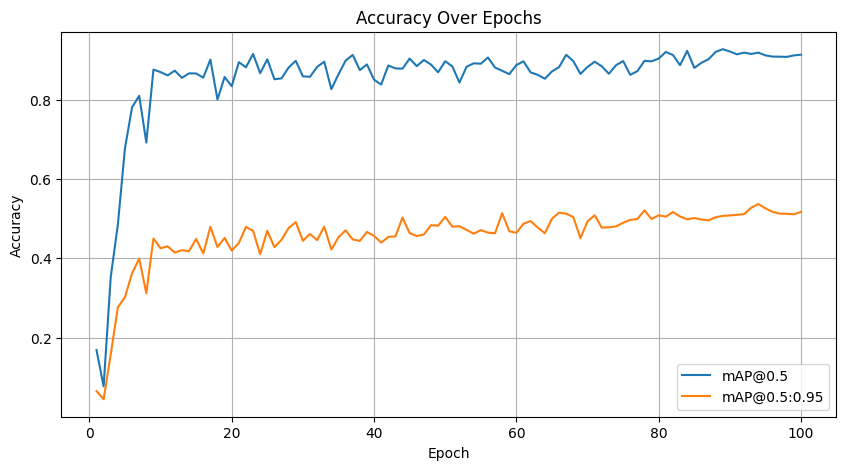

In [24]:
# Extract epochs and accuracy metrics
epochs = results.index + 1  # Epochs are zero-indexed, so add 1
mAP_0_5 = results['metrics/mAP50(B)']  # Mean Average Precision at IoU=0.5
mAP_0_5_0_95 = results['metrics/mAP50-95(B)']  # Mean Average Precision at IoU=0.5:0.95

import matplotlib.pyplot as plt
# Plot the accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, mAP_0_5, label='mAP@0.5')
plt.plot(epochs, mAP_0_5_0_95, label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
model.save('best_licence_plate.pt')

In [52]:
def predict_plot(imgpath):
    results = model.predict(imgpath)
    # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
    img = cv2.cvtColor(imgpath, cv2.COLOR_BGR2RGB)
    for result in results:
        for box in result.boxes:
            print(box) 
            x1 , y1 ,x2 , y2 = map(int,box.xyxy[0])
            confidence = box.conf[0]

            cv2.rectangle(img , (x1 , y1),(x2 , y2),(0,255,0),2)
            cv2.putText(img, f'{confidence*100:.2f}%', (x1, y1 - 10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [40]:
!pip install pytesseract

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [67]:
import pytesseract 
from pytesseract import Output

  """
    Predicts and plots the bounding boxes on the given test image using the trained YOLO model.
    Also performs OCR on the detected bounding boxes to extract text.
    
    Parameters:
    path_test_car (str): Path to the test image file.
    """
    
    
def get_plate_plot(imgpath):
    results = model.predict(imgpath)
    # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
    img = cv2.cvtColor(imgpath, cv2.COLOR_BGR2RGB)
    for result in results:
        for box in result.boxes:
            print(box) 
            x1 , y1 ,x2 , y2 = map(int,box.xyxy[0])
            confidence = box.conf[0]

            cv2.rectangle(img , (x1 , y1),(x2 , y2),(0,255,0),2)
            cv2.putText(img, f'{confidence*100:.2f}%', (x1, y1 - 10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
            
            # Crop the bounding box from the image for OCR
            roi = img[y1:y2, x1:x2]
            # Perform OCR on the cropped image
            text = pytesseract.image_to_string(roi, config='--psm 6')
            print(f"Detected text: {text}")
            
    plt.imshow(img)
    plt.axis('off')
    plt.show()


0: 224x320 1 license_plate, 8.6ms
Speed: 1.1ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 320)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8225], device='cuda:0')
data: tensor([[ 97.6624, 259.2331, 195.9925, 282.9203,   0.8225,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (300, 467)
shape: torch.Size([1, 6])
xywh: tensor([[146.8275, 271.0767,  98.3301,  23.6872]], device='cuda:0')
xywhn: tensor([[0.3144, 0.9036, 0.2106, 0.0790]], device='cuda:0')
xyxy: tensor([[ 97.6624, 259.2331, 195.9925, 282.9203]], device='cuda:0')
xyxyn: tensor([[0.2091, 0.8641, 0.4197, 0.9431]], device='cuda:0')
Detected text: ~ DL49 AK49



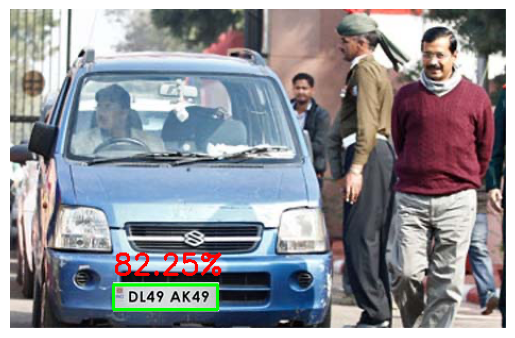

In [71]:
imgg = cv2.imread('/kaggle/working/datasets/cars_license_plate_new/test/images/Cars152.png')
# predict_plot(imgg)
get_plate_plot(imgg)